<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/tb3py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example of using TB3Py https://github.com/usnistgov/tb3py/ and get wannier90_hr.dat file.

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [1]:
%%time
!conda install conda-forge::julia -y --quiet

Channels:
 - conda-forge
Platform: linux-64
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda-forge::julia


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    arpack-3.9.1               |nompi_h77f6705_101         127 KB  conda-forge
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2024.8.30          |     pyhd8ed1ab_0         160 KB  conda-forge
    curl-8.5.0                 |       hca28451_0          93 KB  conda-forge
    gettext-0.22.5             |       he02047a_3         468 KB  conda-forge
    gettext-tools-0.22.5       |       he02047a_3         2.6 MB  conda-forge
    git-2.45.0                 | pl5321hd39f443_0         9.8 MB  conda-forge
    gmp-6.3.0                  |       hac33072_2         449 KB  conda-forge
    julia-1.10.3               |      

In [2]:
import numpy

In [3]:
!julia --version

julia version 1.10.3


In [4]:
!julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null

In [5]:
%%time

!julia -e 'using Pkg; Pkg.add(url = "https://github.com/usnistgov/ThreeBodyTB.jl")' &> /dev/null

CPU times: user 4.29 s, sys: 525 ms, total: 4.82 s
Wall time: 9min 35s


In [6]:
%%time
!julia -e 'using Pkg; Pkg.add("Plot")' &> /dev/null

CPU times: user 88 ms, sys: 9.02 ms, total: 97 ms
Wall time: 9.86 s


In [7]:
!pip install -q jarvis-tools spglib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 83.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 12.8 MB/s eta 0:00:00


In [8]:
import os

pos="""Si2
1.0
3.3641499856336465 -2.5027128e-09 1.94229273881412
1.121382991333525 3.1717517190189715 1.9422927388141193
-2.5909987e-09 -1.8321133e-09 3.884586486670313
Si
2
Cartesian
3.92483875 2.77528125 6.7980237500000005
0.56069125 0.39646875 0.9711462500000001
"""
pos="""C2
1.0
1.2320971008984494 -2.1340542301747005 0.0
1.2320971008984494 2.1340542301747005 0.0
0.0 0.0 30.803073
C
2
Cartesian
0.0 0.0 1.9507584231000183
1.2321 0.7113514226999862 1.9507584231000183
"""
with open("POSCAR","w") as f:
    f.write(pos)

lines="""using ThreeBodyTB
c = makecrys("POSCAR")
energy, tbc, flag = scf_energy(c);
println("directgap, indirectgap, gaptype, bandwidth",string(ThreeBodyTB.BandStruct.band_summary(tbc)),tbc.efermi)
write_hr_dat(tbc,filename="my_hr.dat")
"""
with open("input.jl","w") as f:
     f.write(lines)
#cmd = "!julia input.jl"
#os.system(cmd)

In [9]:
!julia input.jl

┌ Warning: CHOLMOD version incompatibility
│ 
│ Julia was compiled with CHOLMOD version 4.0.4. It is
│ currently linked with version 5.3.0.
│ This might cause Julia to terminate when working with
│ sparse matrix factorizations, e.g. solving systems of
│ equations with \.
│ 
│ It is recommended that you use Julia with the same major
│ version of CHOLMOD as the one used during the build, or
│ download the generic binaries from www.julialang.org,
│ which ship with the correct versions of all dependencies.
└ @ SparseArrays.CHOLMOD /usr/local/share/julia/stdlib/v1.10/SparseArrays/src/solvers/cholmod.jl:206

found /root/.julia/packages/ThreeBodyTB/HW8CZ/src/../dats/pbesol/v1.3/els/coef.el.2bdy.C.xml.gz
Tuple{Symbol, Symbol}
found /root/.julia/packages/ThreeBodyTB/HW8CZ/src/../dats/pbesol/v1.3/els/coef.el.3bdy.C.xml.gz


START SCF ----------------
SCF CALC 0001 energy  -18.94188245    
SCF CALC 0002 energy  -18.94188245  en_diff:   0.000000E+00  dq_diff:   1.243450E-14   mix: 5.000000E-02 

Y

You can download my_hr.dat file by clicking on older icon on lef and download.

In [10]:
from jarvis.io.wannier.outputs import WannierHam
w = WannierHam(filename='my_hr.dat')

H size 19 21 3 8 8


DOS BAND GAP  0.08522355620102896      -0.029350392461461993   0.05587316373956697
np.sum(dos)  7.600461843923312


Text(0, 0.5, 'DOS')

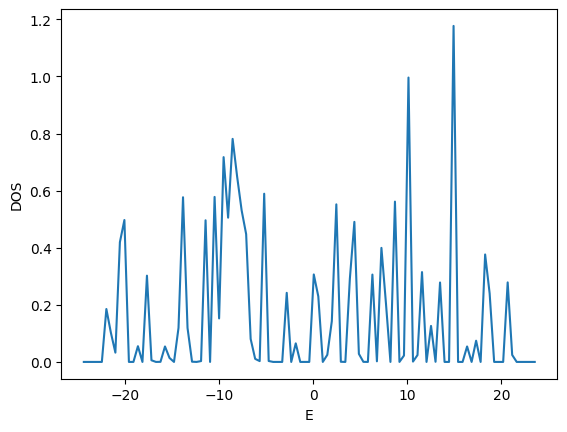

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from jarvis.core.kpoints import generate_kgrid
kpoints = generate_kgrid([20, 20, 20])
energies, dos, pdos = w.dos(kpoints)
plt.plot(energies, dos)
plt.xlabel('E')
plt.ylabel('DOS')

In [ ]:
from jarvis.io.vasp.inputs import Poscar
atoms=Poscar.from_string(pos).atoms
filename='bands.png'
w.get_bandstructure_plot(atoms=atoms, filename=filename,yrange=[-8, 4])

/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


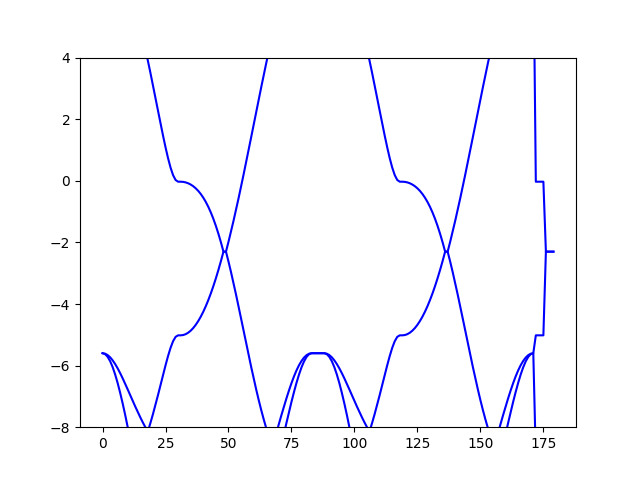

In [ ]:
from IPython.display import Image
Image('bands.png')

See also https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/ThreeBodyTB_julia.ipynb